In [1]:
import numpy as np
import matplotlib.pyplot as plt

horizon = 10000
num_experiment = 100

In [2]:
def pull_arms(prob):
    return np.random.binomial(1, prob)


def UCB_algo(prob_list):
    mu_1, mu_2 = 0, 0
    T_1, T_2 = 0, 0
    prob_arm_1 = prob_list[0]
    prob_arm_2 = prob_list[1]
    regret_list = []
    prob_opt = max(prob_list)
    optimal_arm_played = []
    for t in range(horizon):
        if t == 0:
            arm = 1
        elif t == 1:
            arm = 2
        else:
            ucb_1 = mu_1 + np.sqrt(2 * np.log(t) / T_1)
            ucb_2 = mu_2 + np.sqrt(2 * np.log(t) / T_2)
            arm = 1 if ucb_1 > ucb_2 else 2
        reward = pull_arms(prob_list[arm - 1])
        if arm == 1:
            T_1 += 1
            mu_1 += (reward - mu_1) / T_1
            prob_chosen = prob_arm_1
        else:
            T_2 += 1
            mu_2 += (reward - mu_2) / T_2
            prob_chosen = prob_arm_2

        optimal_arm_played.append(1 if prob_chosen == prob_opt else 0)
        regret = prob_opt - prob_chosen
        regret_list.append(regret)

    cum_regret = np.cumsum(regret_list)
    optimal_arm_percentage = np.cumsum(optimal_arm_played) / np.arange(1, horizon + 1)
    return cum_regret, optimal_arm_percentage


def Variant_UCB_algorithm(prob_list):
    mu_1, mu_2 = 0, 0
    T_1, T_2 = 0, 0
    prob_arm_1 = prob_list[0]
    prob_arm_2 = prob_list[1]
    regret_list = []
    prob_opt = max(prob_list)
    optimal_arm_played = []
    for t in range(horizon):
        if t == 0:
            arm = 1
        elif t == 1:
            arm = 2
        else:
            variant_ucb_1 = mu_1 + np.sqrt(2 * np.log(horizon) / T_1)
            variant_ucb_2 = mu_2 + np.sqrt(2 * np.log(horizon) / T_2)
            arm = 1 if variant_ucb_1 > variant_ucb_2 else 2
        reward = pull_arms(prob_list[arm-1])
        if arm == 1:
            T_1 += 1
            mu_1 += (reward - mu_1) / T_1
            prob_chosen = prob_arm_1
        else:
            T_2 += 1
            mu_2 += (reward - mu_2) / T_2
            prob_chosen = prob_arm_2
        optimal_arm_played.append(1 if prob_chosen == prob_opt else 0)
        regret = prob_opt - prob_chosen
        regret_list.append(regret)
    cum_regret = np.cumsum(regret_list)
    optimal_arm_percentage = np.cumsum(optimal_arm_played) / np.arange(1, horizon + 1)
    return cum_regret, optimal_arm_percentage


def ETC_algorithm(prob_list, k):
    mu_1, mu_2 = 0, 0
    time_1_list = []
    regret_list = []
    prob_opt = max(prob_list)
    optimal_arm_played = []
    for t in range(1, horizon + 1):
        if t <= k:
            arm = 1 if t % 2 == 1 else 2
            reward = pull_arms(prob_list[arm-1])
            if arm == 1:
                mu_1 += (reward - mu_1) / max(1, t//2 + t%2)
            else:
                mu_2 += (reward - mu_2) / max(1, t//2)
            time_1_list.append(1 if arm == 1 else 0)
            prob_chosen = prob_list[arm-1]
        else:
            arm = 1 if mu_1 >= mu_2 else 2
            reward = pull_arms(prob_list[arm-1])
            time_1_list.append(1 if arm == 1 else 0)
            prob_chosen = prob_list[arm-1]
        optimal_arm_played.append(1 if prob_chosen == prob_opt else 0)
        regret = prob_opt - prob_chosen
        regret_list.append(regret)
    cum_regret = np.cumsum(regret_list)
    optimal_arm_percentage = np.cumsum(optimal_arm_played) / np.arange(1, horizon + 1)
    return cum_regret, optimal_arm_percentage

In [3]:
def run_algo():
    p1 = [0.9, 0.6]
    p2 = [0.9, 0.7]
    p3 = [0.6, 0.4]
    p4 = [0.5, 0.5]
    problems = [p1, p2, p3, p4]

    for ind, prob_list in enumerate(problems):
        ucb_regret_all = np.zeros((num_experiment, horizon))
        var_ucb_regret_all = np.zeros((num_experiment, horizon))
        etc_regret_all = np.zeros((num_experiment, horizon))
        ucb_optimal_all = np.zeros((num_experiment, horizon))
        var_ucb_optimal_all = np.zeros((num_experiment, horizon))
        etc_optimal_all = np.zeros((num_experiment, horizon))

        for experiment in range(num_experiment):
            cum_regret_ucb, optimal_arm_percentage_ucb = UCB_algo(prob_list)
            cum_regret_var_ucb, optimal_arm_percentage_var_ucb = Variant_UCB_algorithm(prob_list)
            k = 100
            cum_regret_etc, optimal_arm_percentage_etc = ETC_algorithm(prob_list, k)
            ucb_regret_all[experiment] = cum_regret_ucb
            var_ucb_regret_all[experiment] = cum_regret_var_ucb
            etc_regret_all[experiment] = cum_regret_etc
            ucb_optimal_all[experiment] = optimal_arm_percentage_ucb
            var_ucb_optimal_all[experiment] = optimal_arm_percentage_var_ucb
            etc_optimal_all[experiment] = optimal_arm_percentage_etc

        mean_ucb_regret = np.mean(ucb_regret_all, axis=0)
        mean_var_ucb_regret = np.mean(var_ucb_regret_all, axis=0)
        mean_etc_regret = np.mean(etc_regret_all, axis=0)
        se_ucb_regret = np.std(ucb_regret_all, axis=0) / np.sqrt(num_experiment)
        se_var_ucb_regret = np.std(var_ucb_regret_all, axis=0) / np.sqrt(num_experiment)
        se_etc_regret = np.std(etc_regret_all, axis=0) / np.sqrt(num_experiment)

        mean_ucb_optimal = np.mean(ucb_optimal_all, axis=0)
        mean_var_ucb_optimal = np.mean(var_ucb_optimal_all, axis=0)
        mean_etc_optimal = np.mean(etc_optimal_all, axis=0)
        se_ucb_optimal = np.std(ucb_optimal_all, axis=0) / np.sqrt(num_experiment)
        se_var_ucb_optimal = np.std(var_ucb_optimal_all, axis=0) / np.sqrt(num_experiment)
        se_etc_optimal = np.std(etc_optimal_all, axis=0) / np.sqrt(num_experiment)

        x = range(1, horizon + 1)

        plt.figure(figsize=(10, 6))
        plt.plot(x, mean_ucb_regret, label='UCB')
        plt.fill_between(x, mean_ucb_regret - se_ucb_regret, mean_ucb_regret + se_ucb_regret, alpha=0.2)
        plt.plot(x, mean_var_ucb_regret, label='Variant UCB')
        plt.fill_between(x, mean_var_ucb_regret - se_var_ucb_regret, mean_var_ucb_regret + se_var_ucb_regret, alpha=0.2)
        plt.plot(x, mean_etc_regret, label='ETC')
        plt.fill_between(x, mean_etc_regret - se_etc_regret, mean_etc_regret + se_etc_regret, alpha=0.2)
        plt.title(f'Problem {ind + 1} - Cumulative Regret')
        plt.xlabel('Rounds')
        plt.ylabel('Cumulative Regret')
        plt.legend()
        plt.grid(True)
        plt.show()

        plt.figure(figsize=(10, 6))
        plt.plot(x, mean_ucb_optimal, label='UCB')
        plt.fill_between(x, mean_ucb_optimal - se_ucb_optimal, mean_ucb_optimal + se_ucb_optimal, alpha=0.2)
        plt.plot(x, mean_var_ucb_optimal, label='Variant UCB')
        plt.fill_between(x, mean_var_ucb_optimal - se_var_ucb_optimal, mean_var_ucb_optimal + se_var_ucb_optimal, alpha=0.2)
        plt.plot(x, mean_etc_optimal, label='ETC')
        plt.fill_between(x, mean_etc_optimal - se_etc_optimal, mean_etc_optimal + se_etc_optimal, alpha=0.2)
        plt.title(f'Problem {ind + 1} - Percentage of Optimal Arm Played')
        plt.xlabel('Rounds')
        plt.ylabel('Percentage of Optimal Arm')
        plt.legend()
        plt.grid(True)
        plt.show()

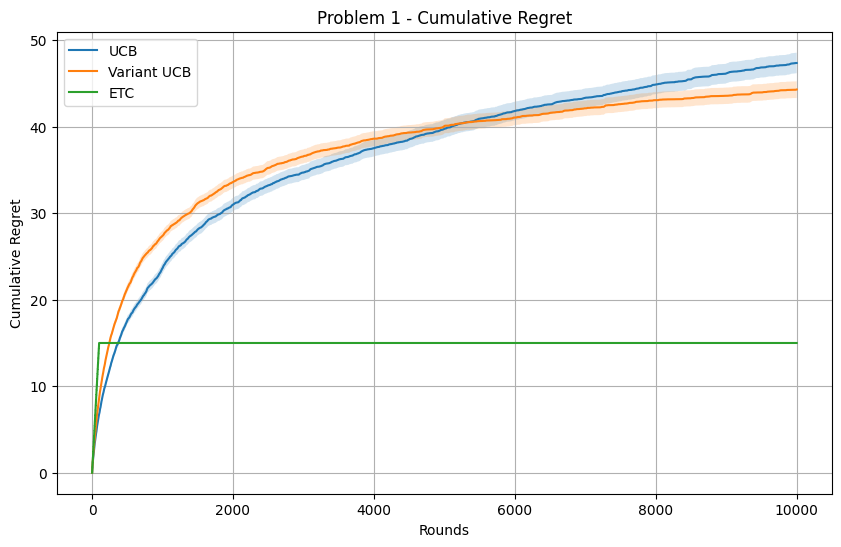

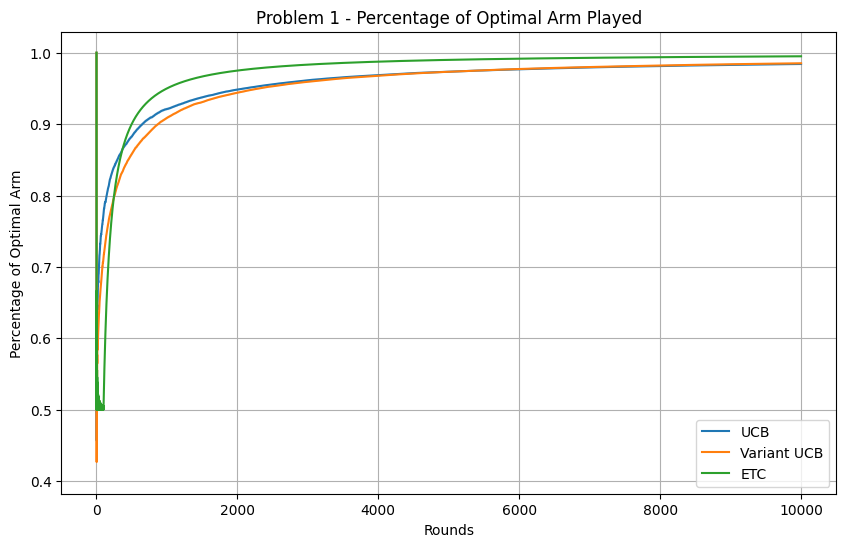

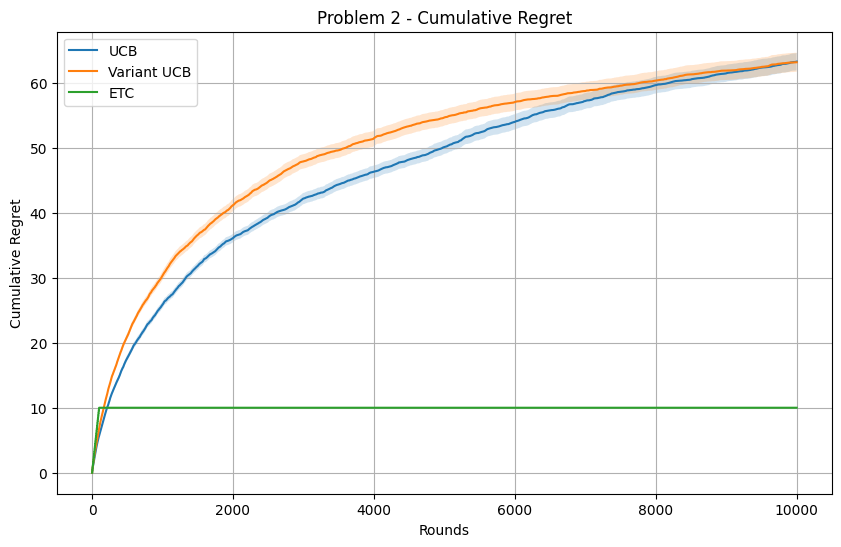

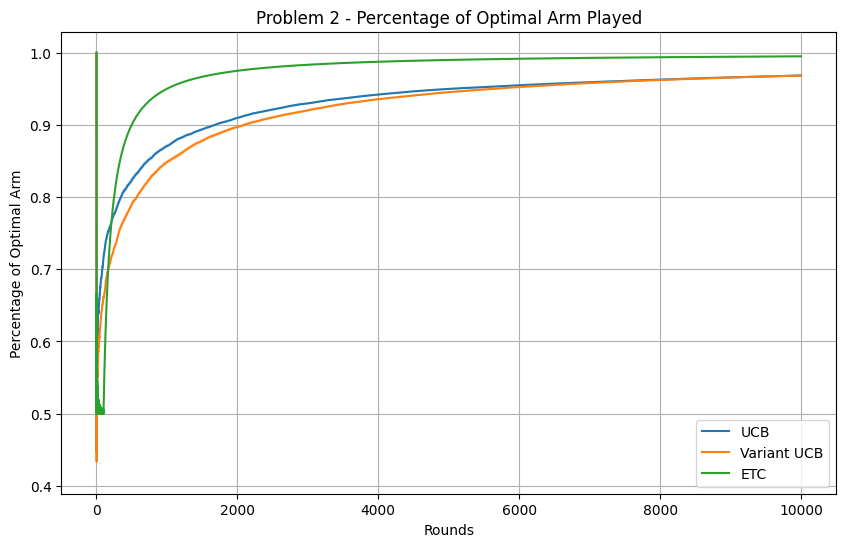

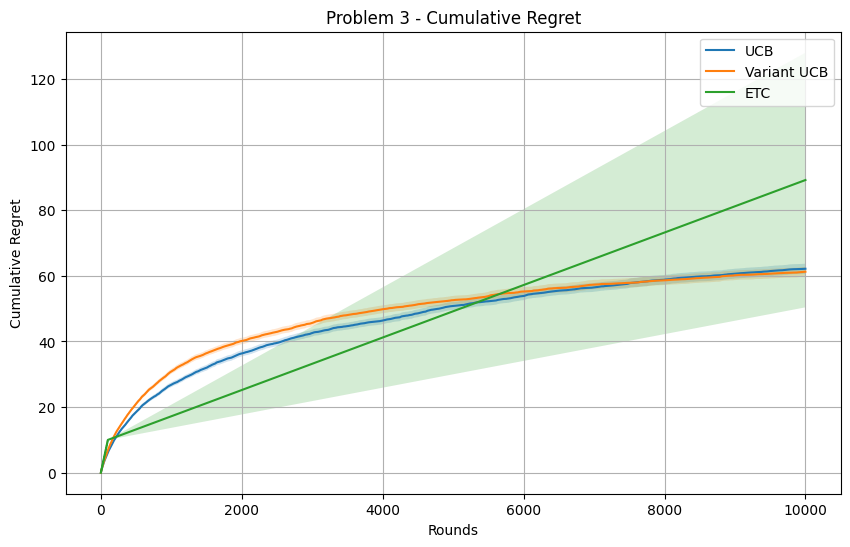

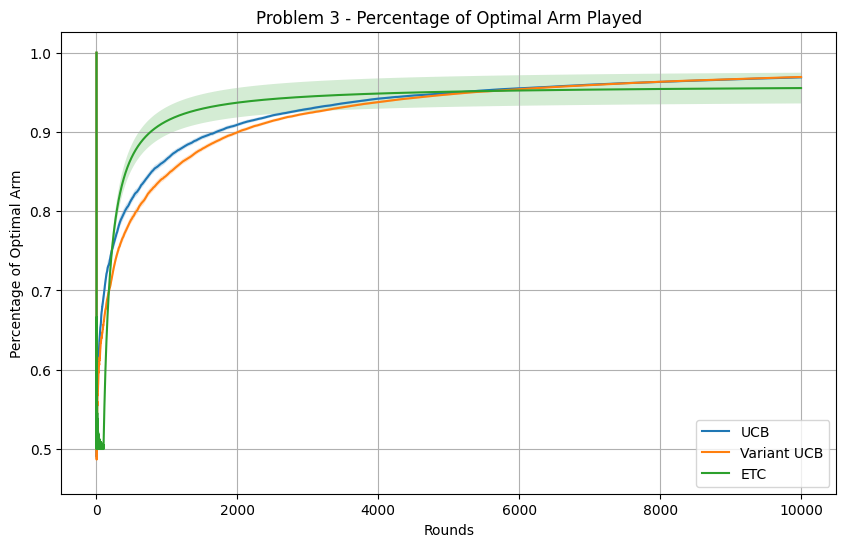

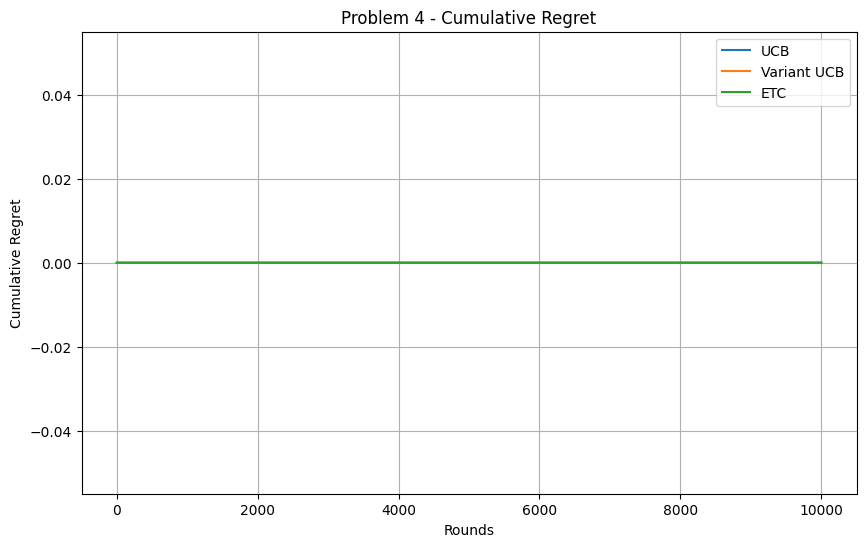

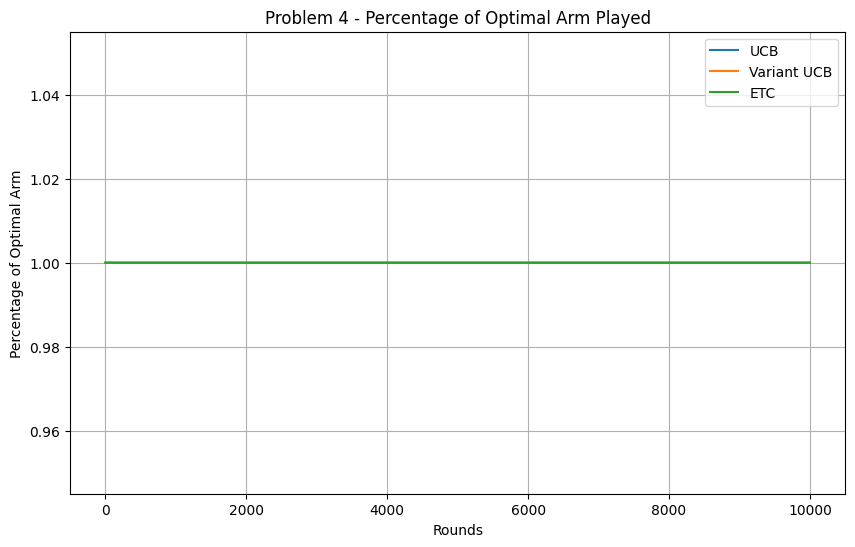

In [4]:
run_algo()